In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/FLASH/Desktop/coursera/project_dataset"

CATEGORIES = ["Anam", "Angad","Achintya"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

<Figure size 640x480 with 1 Axes>

In [2]:
print(img_array)

[[ 75  73  71 ... 163 168 168]
 [ 76  74  71 ... 165 171 171]
 [ 76  74  72 ... 167 173 174]
 ...
 [142 142 142 ... 192 193 194]
 [142 142 142 ... 191 192 192]
 [142 142 142 ... 191 191 191]]


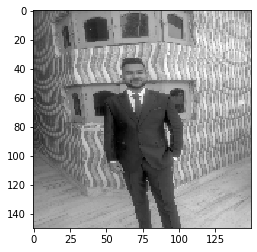

In [3]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

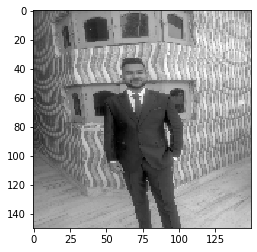

In [4]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [5]:

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        
        if(CATEGORIES.index(category) == 0):
            class_num = 'Anam'  # get the classification  (0 or a 1). 0=dog 1=cat
        elif(CATEGORIES.index(category) == 1):
            class_num = 'Angad'
        else:
            class_num = 'achintya'
        
        
        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            
create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 201/201 [00:05<00:00, 36.60it/s]

603


In [6]:
import random

random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])

achintya
achintya
achintya
Angad
Anam
achintya
Angad
Anam
Anam
Anam


In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[159]
   [142]
   [160]
   ...
   [255]
   [255]
   [255]]

  [[162]
   [142]
   [154]
   ...
   [255]
   [255]
   [255]]

  [[164]
   [141]
   [150]
   ...
   [255]
   [255]
   [255]]

  ...

  [[ 19]
   [ 21]
   [ 27]
   ...
   [204]
   [204]
   [204]]

  [[ 19]
   [ 20]
   [ 23]
   ...
   [204]
   [204]
   [204]]

  [[ 21]
   [ 19]
   [ 20]
   ...
   [204]
   [204]
   [204]]]]


In [9]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [10]:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [11]:
X[1], y[1]

(array([[[236],
         [237],
         [228],
         ...,
         [226],
         [215],
         [205]],
 
        [[237],
         [234],
         [228],
         ...,
         [235],
         [215],
         [197]],
 
        [[238],
         [230],
         [223],
         ...,
         [238],
         [231],
         [240]],
 
        ...,
 
        [[ 68],
         [ 67],
         [ 67],
         ...,
         [ 53],
         [ 20],
         [ 25]],
 
        [[ 67],
         [ 67],
         [ 67],
         ...,
         [ 26],
         [ 24],
         [ 23]],
 
        [[ 69],
         [ 68],
         [ 68],
         ...,
         [ 34],
         [ 23],
         [ 32]]], dtype=uint8), 'achintya')

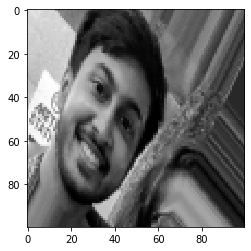

In [12]:
IMG_SIZE = 100

new_array = cv2.resize(X[10], (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()